In [1]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('bfi.csv')

In [3]:
# Axis 1 is column, axis 0 is row
df.drop(['Unnamed: 0', 'gender', 'education', 'age'], axis=1, inplace=True)
df.dropna(inplace=True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [5]:
# Create factor analyzer project
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [6]:
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [7]:
# Get the load
loadings = fa.loadings_
loadings

array([[ 9.52197422e-02,  4.07831571e-02,  4.87338843e-02,
        -5.30987346e-01, -1.13057329e-01,  1.61216349e-01],
       [ 3.31312762e-02,  2.35538040e-01,  1.33714395e-01,
         6.61140977e-01,  6.37337870e-02, -6.24353650e-03],
       [-9.62088416e-03,  3.43008174e-01,  1.21353367e-01,
         6.05932694e-01,  3.39902645e-02,  1.60106427e-01],
       [-8.15175587e-02,  2.19716721e-01,  2.35139531e-01,
         4.04594039e-01, -1.25338020e-01,  8.63557019e-02],
       [-1.49615885e-01,  4.14457675e-01,  1.06382165e-01,
         4.69698290e-01,  3.09765714e-02,  2.36519342e-01],
       [-4.35840200e-03,  7.72477525e-02,  5.54582257e-01,
         7.51069507e-03,  1.90123729e-01,  9.50350483e-02],
       [ 6.83300837e-02,  3.83703845e-02,  6.74545450e-01,
         5.70549873e-02,  8.75925906e-02,  1.52775080e-01],
       [-3.99936734e-02,  3.18673007e-02,  5.51164438e-01,
         1.01282241e-01, -1.13380873e-02,  8.99628298e-03],
       [ 2.16283366e-01, -6.62407736e-02, -6.384

In [8]:
ev, v = fa.get_eigenvalues()

In [18]:
xvals = range(1, df.shape[1]+1)

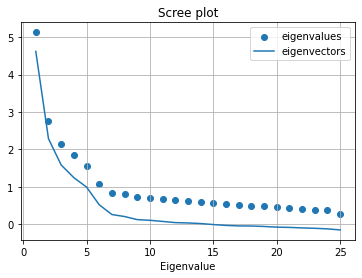

In [24]:
plt.scatter(xvals, ev, label='eigenvalues')
plt.plot(xvals, v, label='eigenvectors')
plt.title('Scree plot')
plt.xlabel('Factor')
plt.xlabel('Eigenvalue')
plt.legend()
plt.grid()
plt.show()

The 6th first components seem to be the most relevant in the data. 7+ seems to become more 'horizontal' meaning it does not affect the data as greatly.

In [25]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
5,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
6,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
7,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
8,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
9,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423
